(900, 900, 3)

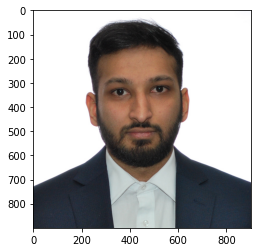

In [ ]:
#Reading the image and visualizing it
import numpy as np
import matplotlib.pyplot as plt
import math

img=plt.imread('USA.jpg');
plt.imshow(img)
img.shape

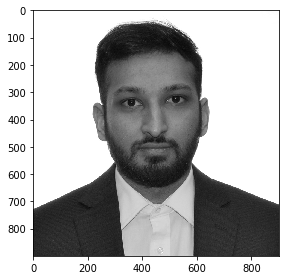

In [ ]:
#Converting the image to greyscale
from skimage import color
from skimage import io

img = io.imread('USA.jpg')
imgGray = color.rgb2gray(img)

io.imshow(imgGray)

In [ ]:
#Printing the image matrix and its shape
print(imgGray)
print(imgGray.shape)

[[1.         1.         1.         ... 0.9806898  0.9806898  0.97676824]
 [1.         1.         1.         ... 0.9806898  0.9806898  0.9806898 ]
 [1.         1.         1.         ... 0.98461137 0.9806898  0.9806898 ]
 ...
 [0.15082118 0.15474275 0.16063647 ... 0.12585529 0.11409059 0.10624745]
 [0.15192235 0.15417725 0.15417725 ... 0.12193373 0.12585529 0.12585529]
 [0.16312157 0.1592     0.15249569 ... 0.12445647 0.13229961 0.14406431]]
(900, 900)


In [ ]:
#Performing 2D Convolution by hand
def convolution(img, kern):
  img_r, img_c = img.shape
  kern_r, kern_c = kern.shape
  print(kern.shape)

  outp = np.zeros(img.shape)

  pad_h = int((kern_r - 1) / 2)
  print(pad_h)
  pad_w = int((kern_c - 1) / 2)
  print(pad_w)
  padded_image = np.zeros((img_r + (2 * pad_h), img_c + (2 * pad_w)))
  print(padded_image.shape)
  padded_image[pad_h:padded_image.shape[0] - pad_h, pad_w:padded_image.shape[1] - pad_w] = img

  for row in range(img_r):
      for col in range(img_c):
          outp[row, col] = np.sum(kern * padded_image[row:row + kern_r, col:col + kern_c])
          outp[row,col] /= (kern.shape[0] * kern.shape[1])
  
  return outp

In [ ]:
#This mask acts as filter for horizontal edge detection
edge_mask = np.array([[-1, 0, 1],[-1,0,1],[-1,0,1]])
edged = convolution(imgGray, edge_mask)
edged

(3, 3)
1
1
(902, 902)


array([[ 2.22222222e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.35729847e-04, -2.17931068e-01],
       [ 3.33333333e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.35729847e-04, -8.71459695e-04, -3.26896601e-01],
       [ 3.33333333e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.35729847e-04, -4.35729847e-04, -3.27332331e-01],
       ...,
       [ 5.26086710e-02,  1.99599129e-03, -2.83098039e-03, ...,
        -2.61437908e-03, -8.71459695e-04, -4.20145969e-02],
       [ 5.20133333e-02,  1.60479303e-04, -4.01163399e-03, ...,
        -1.74291939e-03,  4.35729847e-04, -4.13606100e-02],
       [ 3.48196950e-02, -9.30108932e-04, -3.79503268e-03, ...,
         1.30718954e-03,  2.61437908e-03, -2.86838780e-02]])

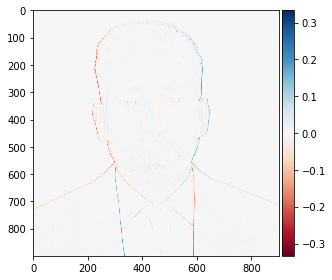

In [ ]:
#Convolved image The highlighted portions are the portions of edges in the image.
io.imshow(edged)

In [ ]:
#This mask acts as vertical filter for edge detection
edge_mask1 = np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]])
edged1 = convolution(imgGray, edge_mask1)
edged

(3, 3)
1
1
(902, 902)


array([[ 2.22222222e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -4.35729847e-04, -2.17931068e-01],
       [ 3.33333333e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.35729847e-04, -8.71459695e-04, -3.26896601e-01],
       [ 3.33333333e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -4.35729847e-04, -4.35729847e-04, -3.27332331e-01],
       ...,
       [ 5.26086710e-02,  1.99599129e-03, -2.83098039e-03, ...,
        -2.61437908e-03, -8.71459695e-04, -4.20145969e-02],
       [ 5.20133333e-02,  1.60479303e-04, -4.01163399e-03, ...,
        -1.74291939e-03,  4.35729847e-04, -4.13606100e-02],
       [ 3.48196950e-02, -9.30108932e-04, -3.79503268e-03, ...,
         1.30718954e-03,  2.61437908e-03, -2.86838780e-02]])

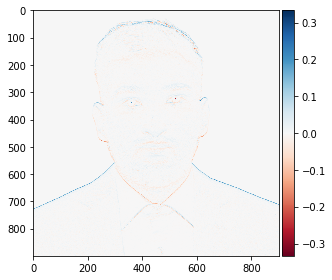

In [ ]:
#Convolved image The highlighted portions are the portions of edges in the image.
io.imshow(edged1)

In [ ]:
#Applying the gaussian formula to the datapoints
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

#Defining the gaussian kernel
def gaussian_kernel(size, sigma=1):
  kern_1D = np.linspace(-(size//2), size // 2, size)
  for i in range(size):
    kern_1D[i] = dnorm(kern_1D[i], 0.5, sigma)
  kern_2D = np.outer(kern_1D.T, kern_1D.T)
  kern_2D *= 1.0 / kern_2D.max()

  return kern_2D

In [ ]:
#Gaussian Blur function calls the kernel function which generates the kernel
#Then it performs convolution function on the image using the kernel
def gaussian_blur(img, kern_size):
  kern = gaussian_kernel(kern_size, 9)
  return convolution(img, kern)

(25, 25)
12
12
(924, 924)


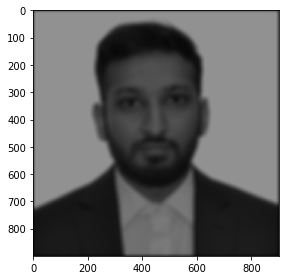

In [ ]:
g = gaussian_blur(imgGray, 25)
io.imshow(g)

In [ ]:
# References: 
#http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/
#https://www.tutorialspoint.com/dip/sobel_operator.html
#https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09
#http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/